# Main Imports

In [24]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.cm as cm
from sklearn.cluster import KMeans 
from filterpy.kalman import KalmanFilter
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from mpl_toolkits.mplot3d import Axes3D

# 2 & 2 Image Processing - Filters

Link: https://www.sanfoundry.com/digital-image-processing-questions-answers-smoothing-spatial-filters/#:~:text=What%20is%20the%20output%20of%20a%20smoothing%2C%20linear%20spatial%20filter%3F&text=Explanation%3A%20The%20output%20or%20response,also%20known%20as%20median%20filter.

What is the output of a smoothing, linear spatial filter?

-Average of pixels -Answer

-Maximum of pixels

-Median of pixels

-Minimum of pixels

# 3 & 1 - Convolution

Link: https://www.cs.cornell.edu/courses/cs1114/2013sp/sections/S06_convolution.pdf

Q - Consider the matrix below. Assume that we want to convolve an image with this matrix. What will be the outcome?

0 0 0

0 0 0

0 1 0

-The image will be shifted downwards by 1 pixel - Answer

-The image will remain unaffected

-The image will be blurred

-The image will be sharpened

-The image will be shifted to the right by 1 pixel

-The image will be shifted upwards by 1 pixel

# 4 & 3 - Image Processing - Filters

Link: https://www.sanfoundry.com/digital-image-processing-questions-answers-smoothing-spatial-filters/#:~:text=What%20is%20the%20output%20of%20a%20smoothing%2C%20linear%20spatial%20filter%3F&text=Explanation%3A%20The%20output%20or%20response,also%20known%20as%20median%20filter.

Another link : https://www.sanfoundry.com/digital-image-processing-questions-answers-spatial-nolinear-filter-smoothing/#:~:text=Explanation%3A%20An%20Order%2DStatistic%20filters,an%20example%20of%20such%20filters.

Q - Which of the following filters response is based on ranking of pixel values?

-Nonlinear smoothing filters - answer

-Linear Smoothing Filters

-Sharpening Filters

# 5 & 4: Covolution and Correlation - Needs to be checked
Q - Consider that we are using the following kernel to perform convolution and correlation on an image. Do you expect the results of the two operations to be different or identical and why?

0.2 0 0.2

0 0.2 0

0.2 0 0.2

The result will be different because none of the kernel elements is larger than 0.5

The results will be identical because the kernel is symmetric - answer

The results will be identical because all the elements of the kernel add up to 1

The results will be different because convolution and correlation are two different operations

In [65]:
from scipy.ndimage import convolve
from scipy.ndimage import correlate
A=np.matrix([[0.2, 0, 0.2],
  [0, 0.2, 0],
  [0.2, 0, 0.2]])
B=np.matrix([[1, 2, 3],
  [6, 7, 8],
  [9, 10, 11]])
print("Conv: ",convolve(A, B))
print("Corr: ",correlate(A, B))

Conv:  [[7.4 7.2 7. ]
 [6.4 6.2 6. ]
 [5.8 5.6 5.4]]
Corr:  [[5.4 5.6 5.8]
 [6.  6.2 6.4]
 [7.  7.2 7.4]]


# 6 & 5: Covolution and Correlation

Q - Can we perform corelation using convolution?

Yes, by modifying the kernel -  answer

Yes, the outcome of corelation and convolution are always the same

No, correlation and convolution are fundamentally different

No, we can only perform convolution using correlation, but not the inverse

# 7 & 6: Harris Detector

Answer link:

https://medium.com/data-breach/introduction-to-harris-corner-detector-32a88850b3f6

### 7.1:

Q - With regards to Harris Detector, choose the correct statement

The Harris detector is used in computer vision to detect Edges

Harris detector uses the difference of gaussians method

The Harris detector is used in computer vision to detect Corners - answer

### 7.2:

Q - With regards to Harris Detector, assuming M the "Harris Matrix" (autocorrelation matrix or structure tensor), choose the correct statement

Assuming λ1 and λ2 the eigenvalues of the matrix M, points where λ1>>λ2 are considered slopes

Assuming λ1 and λ2 the eigenvalues of the matrix M, points where λ2>>λ1 are considered corners

Assuming λ1 and λ2 the eigenvalues of the matrix M, points where λ1~λ2 and large are considered corners - answer


# 8 & 7: SIFT
Scale-invariant feature transform

### 8.1: Concerning the SIFT algorithm, choose the correct statement:

-The detection is based on the Gradient of the Image

-The description is based on the Difference of Gaussians

-The detection is based on the Difference of Gaussians -answer

### 8.2: Concerning the SIFT algorithm, choose the correct statement:

-The fingerprint of the SIFT algorithm is a vector of 64 values

-In the original paper, the matching of the features used the k-NN algorithm

-The description is based on the Gradient of the Image – answer

Question 8.1:

Detection (DoG: Difference of Gaussians) • Use DoG on Scale Space

– Only the maximum or minimum in a neighborhood are considered

– All octaves are investigated

Question 8.2:

Description

• Orientation:

– Based on the gradient

– Create a histogram of orientations

Consisting of 36 bins (every 10 degrees)

# 9 & 8 : Hough Transform¶

Link: https://medium.com/@tomasz.kacmajor/hough-lines-transform-explained-645feda072ab
### 9.1: With regards to Hough Transform, choose the correct statement:

-The Hough transform can’t be used to detect circles

-The Hough transform can be used to detect lines - answer

-The Hough transform is a classification algorithm

### 9.2: With regards to Hough Transform, choose the correct statement:

The Hough transform is only used in Computer Vision

Hough transform can't handle outliers

RANSAC should be used as an alternative to the Hough transform when the dimension of feature is high - answer

Answer:

https://medium.com/@tomasz.kacmajor/hough-lines-transform-explained-645feda072ab

And PDF is there to check

# 10 & 9: Hough Lines

## 10 - Numerical - Hough Line Detection

Using the following image (in the files you downloaded), do the following

-Convert it to grayscale (do not change the size!).

-Apply Canny edge detection (cv2.Canny) with the parameters
"threshold1=100" and "threshold2=200".

-Apply HoughLines (cv2.HoughLines) with the parameters "rho=1",
"theta=0.0017", "threshold=200".

How many lines are detected?

16

32 - answer

64

128

# Code

In [25]:
img = cv2.imread('Question_10/books.png')
## for Canny
threshold1 = 100
threshold2 = 200
## for HoughLines
rho = 1
theta = 0.0017
threshold = 200

def Houghlines(img,canny_threshold1,threshold2,rho,theta,threshold):
        # Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # Apply Canny edge detection
    edges = cv2.Canny(gray, canny_threshold1, threshold2)
    # Apply HoughLines
    lines = cv2.HoughLines(edges, rho, theta, threshold)
    # Print number of lines detected
    print(f"Number of lines detected: {len(lines)}")
    
Houghlines(img,threshold1,threshold2,rho,theta,threshold)

Number of lines detected: 32


# 11 & 10 - Numerical - Harris Corner Detection

Using the following image (in the files you downloaded), do the following: Convert the image to grayscale (do not change the size!).

Apply Harris corner (cv2.cornerHarris) to the image with the parameters "blockSize=2", "ksize=3", "k=0.04".

From the result of Harris Corners, how many values are above 0.01?

(Picture)

128

158

188 -- answer

208

# Code

In [26]:
img = cv2.imread('Question_11/books.png')
# for Harris
blockSize=2
ksize=3
k=0.04 
above = 0.01

def Harriscorner(img,blockSize, ksize, k, above):
    # Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # Apply Harris corner
    corners = cv2.cornerHarris(gray, blockSize, ksize, k)
    # Find number of values above 0.01
    num_values = corners[corners > above].size
    print(f"Number of values above {above}: {num_values}")
    
Harriscorner(img,blockSize,ksize,k,above)

Number of values above 0.01: 188


# 12 & 11- Numerical - Optical Flow

Using the following image (in the files you downloaded), do the following: Load the two images and convert them to grayscale (do not change the size!). Use cv2.goodFeaturesToTrack to find features on the first image (things1.png) using the parameters "maxCorners=100", "qualityLevel=0.3", and "minDistance=7".

Apply sparse optical flow using the function ccv2.calcOpticalFlowPyrLK() What is the maximum amount of pixels moved for any object in the x direction (horizontally)?

~15.5 - answer

~12.5

~20.5

~22.5

# Code

In [27]:
# Parameters
img1 = cv2.imread('Question_12/things1.png')
img2 = cv2.imread('Question_12/things2.png')
# for goodFeaturesToTrack
maxCorners = 100
qualityLevel = 0.3
minDistance = 7

def GoodFeatures(img1,img2,maxCorners,qualityLevel,minDistance):
    # Convert to grayscale
    gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
    gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

    # Use cv2.goodFeaturesToTrack 
    points_1 = cv2.goodFeaturesToTrack(gray1, maxCorners, qualityLevel, minDistance)

    # Apply sparse optical flow 
    points_2, _, _ = cv2.calcOpticalFlowPyrLK(gray1, gray2, points_1, None)

    # Find the maximum amount of pixels moved for any object in the x direction (horizontally)
    max_x = np.abs(points_1[:,:,0]-points_2[:,:,0]).max()
    print(f"Maximum amount of pixels moved for any object in the x direction (horizontally): {max_x}")


GoodFeatures(img1,img2,maxCorners,qualityLevel,minDistance)

Maximum amount of pixels moved for any object in the x direction (horizontally): 15.6368408203125


# 12 (2020):

You have measured a series of sensor intensities using a laser range finder and you
are trying to find a specific object in this series.

The series you have measured is: [47, 211, 38, 53, 204, 116, 152, 249, 143, 177]
    
You know the shape of the object should follow the intensities: [39, 55, 207]
    
To do this you have decided to use SAD template matching. What is the best
matching triplet in your measurements with your known object shape and what is
the SAD for this match?

The best matching triplet is: [47, 211, 38]

The best matching triplet is: [116, 152, 249]

The best matching triplet is: [38, 53, 204]  -- answer 1

The SAD score for the best matching triplet is: 6 -- answer 2...rest everything else is false

The SAD score for the best matching triplet is: 2

The SAD score for the best matching triplet is: 0

The SAD score for the best matching triplet is: 333

# Code

In [66]:
'''
- The series you have measured is: [47, 211, 38, 53, 204, 116, 152, 249, 143, 177]
- Correct intensities: [39, 55, 207]
- SAD(sum of absolute differencess) template matching
'''
import numpy as np
import cv2

# Input
measurements = np.array([47, 211, 38, 53, 204, 116, 152, 249, 143, 177])
correct_intensities = np.array([39, 55, 207])

# Sum of absolute differences
sad = lambda x, y: np.sum(np.abs(x-y))

# Sum of squared differences
ssd = lambda x, y: np.sum((x-y)**2)


def match(measurements, correct, func):
    scores = [func(measurements[i:i+len(correct)], correct) for i, _ in enumerate(measurements[:-len(correct)])]

    # Find the minimum score
    min_score = min(scores)
    print(f"Minimum/best score: {min_score}")

    # Find the index of the minimum score
    min_index = scores.index(min_score)
    print(f"Best matching: {measurements[min_index:min_index+len(correct)]}")
    return min_index, min_score


match(measurements, correct_intensities, func = sad)

Minimum/best score: 6
Best matching: [ 38  53 204]


(2, 6)

### Rest all are the same as the other one



# 13: Stereo Vision Needs to be checked

# Rectified stereo

## 13.1

-Epipolar geometry can be used to describe both unrectified and rectified stereo cases -- answer

-Physically mounting two sensors on a common plane results in a stereo system that requires no further rectification

-In rectified stereo, there are some epipolar lines that are not parallel.

## 13.2:

--The disparity value of a point grows with its depth

--We cannot obtain depth from stereo without knowing the system's focal length and baseline -- answer

--The rectified stereo case is more computationally demanding than unrectified Stereo

# 14 : SAD/SSD - Needs to be checked

Which of the following statements about stereo correspondence algorithms are
correct and which are wrong?

-Bigger windows for calculating dis-similarity metrics such as SAD or
SSD result always in better disparity results, at the expense of more
calculations

-Bigger windows for calculating dis-similarity metrics such as SAD or
SSD result always in worse disparity results, but calculation is faster

--Local algorithms typically produce inferior disparity maps, compared to
global algorithms ---- answer

-Bigger windows are typically preferred for images with finer and more
complicated texture

Answer:
In lecture day 5 stereo vision 

# 15: Colvolution - Stereo Matching???

Could convolution be used to implement (dis-)similarity calculations in stereo
matching?

-Yes, but with proper considerations for formulating the kernel -- answer

-No, it is correlation that expresses (dis-)similarity 

-Yes, because in (dis-)similarity calculations the considered kernel is
symmetric

-No, because in convolution the kernel needs to be smaller than the image

Answer:


# 16: Monocular Case

### Mono Calibration and projection

### 16.1 : With regards to the monocular camera

Projection and Calibration, select the correct statement

Needs to be checked projection matrix has both instrinsic and extrinsic

-The projection matrix includes instrinsic parameters - answer

-The projection matrix includes extrinsic parameters

-The Homography is used to project a point from 3D to 2D

### 16.2 : With regards to the monocular camera

Projection and Calibration, select the correct statement

-When using a flat calibration pattern we can employ the homography to
perform calibration -- answer

-Lens distortion is modeled as a linear function

-The barrel distortion cannot be corrected

# 17: Stereo Case

### Stereo Calibration and projection Need to be checked

### 17.1 : 
With regards to the stereo camera Projection and Calibration, select the correct statement

-The Fundamental Matrix describes only extrinsic parameters

-The Essential matrix contains only extrinsic parameters - answer

-The camera matrix cannot be calculated from the Fundamental Matrix

### 17.2 : With regards to the stereo camera Projection and Calibration, select the correct statement

-The Fundamental matrix projects image points from one image of the
stereo pair to the other-answer

The epipoles of a stereo pair cannot be on the baseline

The epipoles of a stereo system are always found between the two
Cameras

# 18 - Numerical - Stereo Calibration

One property of stereo rectified images is that epipolar lines are parallel, and that
the points on an epipolar line in one image plane can be found on the
corresponding epipolar line in the other image plane. Therefore, it is necessary to
know the equation for the epipolar in order to optimize the performance of any later
template matching.

Determine the approximate coefficients of the epipolar lines in the
imageset left.png and right.png by taking the average of all the epipolar lines.
You should use 2000 of the best matching sift keypoints to compute the epipolar
lines.

Note: opencv computes the epipolar lines in the form ax+by+c=0.

Please select the average epipolar lines that are closer to the ones you calculated

-[-1.69e-02 7.97e-01 -0.26e+02]

 [ 17.02e-02 -7.97e-01 0.25e+02]

-[-6.69e-02 9.97e-01 -1.26e+02]

 [ 7.02e-02 -9.97e-01 1.25e+02]  -------- answer

-[-11.69e-02 17.97e-01 -1.06e+02]

 [ 11.02e-02 -17.97e-01 1.05e+02]

-[-2.69e-02 3.97e-01 -0.06e+02]

 [ 1.02e-02 -3.97e-01 0.05e+02]
 
 check question 18 from abhistas notes from vs code 

# Code

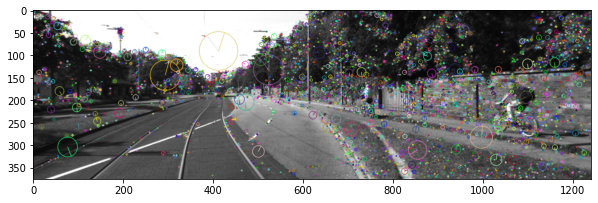

In [29]:
# Q18

img1 = cv2.imread('Question_18/left.png', 0)
img2 = cv2.imread('Question_18/right.png', 0)

sift = cv2.SIFT_create()

# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1, None)
kp2, des2 = sift.detectAndCompute(img2, None)

kp_img = cv2.drawKeypoints(img2, kp2, img2, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.figure(figsize = (10,10))
plt.imshow(kp_img)

In [30]:
bf = cv2.BFMatcher()
matches = bf.match(des1,des2)

# Sort them in the order of their distance (i.e. best matches first).
matches = sorted(matches, key = lambda x:x.distance)

In [31]:
nb_matches = 2000   ### edit here

good = []
pts1 = []
pts2 = []

for m in matches[:nb_matches]:
    good.append(m)
    pts1.append(kp1[m.queryIdx].pt)
    pts2.append(kp2[m.trainIdx].pt)

pts1 = np.int32(pts1)
pts2 = np.int32(pts2)
    
"""
Implement findFundamentalMat here:
F, mask = ...
"""
F, mask = cv2.findFundamentalMat(pts1, pts2, cv2.FM_RANSAC)

# We select only inlier points
pts1 = pts1[mask.ravel() == 1]
pts2 = pts2[mask.ravel() == 1]

In [32]:
def drawlines(img1,img2,lines,pts1,pts2):
    ''' img1 - image on which we draw the epilines for the points in img2
        lines - corresponding epilines '''
    r,c = img1.shape
    img1 = cv2.cvtColor(img1,cv2.COLOR_GRAY2BGR)
    img2 = cv2.cvtColor(img2,cv2.COLOR_GRAY2BGR)
    for r,pt1,pt2 in zip(lines,pts1,pts2):
        color = tuple(np.random.randint(0,255,3).tolist())
        x0,y0 = map(int, [0, -r[2]/r[1] ])
        x1,y1 = map(int, [c, -(r[2]+r[0]*c)/r[1] ])
        img1 = cv2.line(img1, (x0,y0), (x1,y1), color,1)
        img1 = cv2.circle(img1,tuple(pt1),5,color,-1)
        img2 = cv2.circle(img2,tuple(pt2),5,color,-1)
    return img1,img2

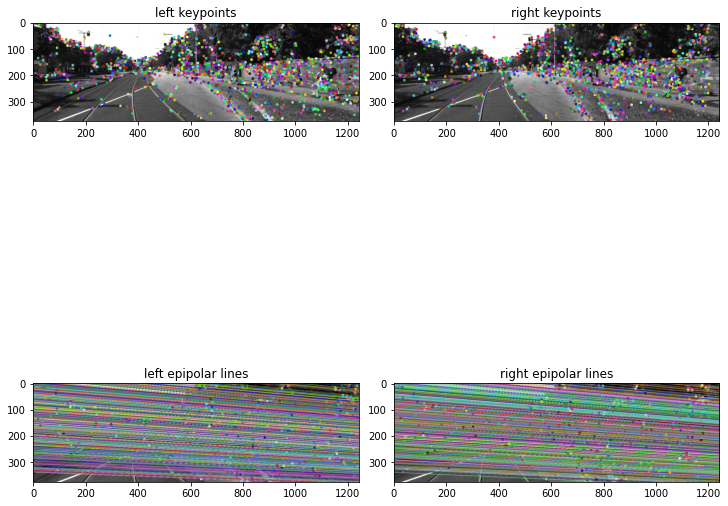

In [33]:
# Find epilines corresponding to points in right image (second image) and
# drawing its lines on left image
lines1 = cv2.computeCorrespondEpilines(pts2.reshape(-1, 1, 2), 2 ,F)
lines1 = lines1.reshape(-1, 3)
img5, img6 = drawlines(img1, img2, lines1, pts1, pts2)

# Find epilines corresponding to points in left image (first image) and
# drawing its lines on right image
lines2 = cv2.computeCorrespondEpilines(pts1.reshape(-1, 1, 2), 1, F)
lines2 = lines2.reshape(-1, 3)
img3, img4 = drawlines(img2, img1, lines2, pts2, pts1)

fig, axs = plt.subplots(2, 2, constrained_layout=True, figsize=(10,10))
axs[0, 0].imshow(img4)
axs[0, 0].set_title('left keypoints')
axs[0, 1].imshow(img6)
axs[0, 1].set_title('right keypoints')
axs[1, 0].imshow(img5)
axs[1, 0].set_title('left epipolar lines')
axs[1, 1].imshow(img3)
axs[1, 1].set_title('right epipolar lines')
plt.show()

In [34]:
print(lines1.shape)
print(lines2.shape)

(1577, 3)
(1577, 3)


In [35]:
print(sum(lines1)/1476)
avg1 = sum(lines1)/1476
print(sum(lines2)/1476)
avg2 = sum(lines2)/1476
print((avg1 + avg2)/2)

[-7.1513452e-02  1.0659618e+00 -1.3539922e+02]
[ 7.5101465e-02 -1.0657287e+00  1.3399178e+02]
[ 1.79400668e-03  1.16586685e-04 -7.03720093e-01]


# 19: RANSAC

The number of iterations k that RANSAC needs in order to achieve a good (outlierfree)
model with probability p
is defined by the formula: k = log(1−p)/log(1−w2)
where k is the number of iterations, p is the probability of RANSAC having chosen a
set of points free of outliers, w is the proportion of inliers with respect to all the
points in the dataset.


### 19.1 :

Assume that we want a probability of success at least 98% and we know that 75%
of the points are inliers. How many iterations does RANSAC need to achieve this?

The number of needed iterations is: k = 3

The number of needed iterations is: k = 5 ---- answer

The number of needed iterations is: k = 14

The number of needed iterations is: k = 64

### 19.2 :
How would the number of needed iterations change if the size of our dataset
(number of points) doubled, but all other aspects of our scenario remained the
same?

With a dataset twice as big, the number of required iterations would be
half

With a dataset twice as big, the number of required iterations would be
the same  ------- answer

With a dataset twice as big, the number of required iterations would be
Double

# Code

In [36]:
#Question 19.1
# Parameters
p = 0.98
w = 0.75

def num_iterations(p, w):
    # Round number of iterations to the nearest integer(up)
    n_iter = np.ceil(np.log(1-p)/np.log(1-w**2))
    return n_iter

print(f"Number of iterations: {num_iterations(p, w)}")

Number of iterations: 5.0


# 20

## Iterative Closest Point (ICP) algorithm

### 20.1 :

ICP is guaranteed to converge (within a reasonable accuracy) no matter
what the initial relative pose of the two point clouds is.

ICP is one of the underlying algorithms for implementing the Kabsch
algorithm

ICP is not particularly robust to outliers --- answer

### 20.2:

ICP could employ either Spin Images or FPFH for finding the interediate
transformations until convergence

When using ICP, one may only use the Kabsch algorithm and not the
Procrustes analysis

ICP is a deterministic algorithm -- answer

# 21: Point Cloud Registration

In Point Cloud Registration, local alignment usually takes place first, and global
alignment second.

Is the statement correct or wrong?

Correct

Wrong -- answer

# 22 : Kabsch algorithm

The Kabsch algorithm is typically used both for Local and Global alignment.

--Yes, the Kabsch algorithm is used in both cases ---answer

--No, the Kabsch algorithm is only used for Local alignment

--No, the Kabsch algorithm is only used for Global alignment

# 23 - K - Means and PCA

Apply K-means and/or PCA on the provided dataset and select the correct answers
to the following questions.

### 23.1: K-Means

Apply K-means and use the elbow method to find how many clusters (K) are
optimal for this dataset.
Follow the guidelines and use the material found in the provided archive.

-The optimal K is: 3

-The optimal K is: 4

-The optimal K is: 5  -----answer not sure

-The optimal K is: 6  (not sure)

-The optimal K is: 7


### 23.2: PCA

Perform PCA on the provided dataset and determine the minimum number of
components required to express 95% of the variance.

Follow the guidelines and use the material found in the provided archive.

-For 95%, the number of needed components is: 2

-For 95%, the number of needed components is: 3

-For 95%, the number of needed components is: 4

-For 95%, the number of needed components is: 5

-For 95%, the number of needed components is: 6  ----answer  

### 23.3 : K-means on the PCA transformed data - Distortion Calculation

Perform K-means on the PCA transformed data and calculate
the Distortion/Inertia (sum of squared distances of samples to the closest centroid)

Use the value of K found in "Question 23.1" and apply K-means on the PCA
transformed data that you obtained in "Question 23.2".

Follow the guidelines and use the material found in the provided archive.

-Distortion has a value between: 1500 and 2000  --- answer

-Distortion has a value between: 3000 and 4000

-Distortion has a value between: 4500 and 5000

# Code

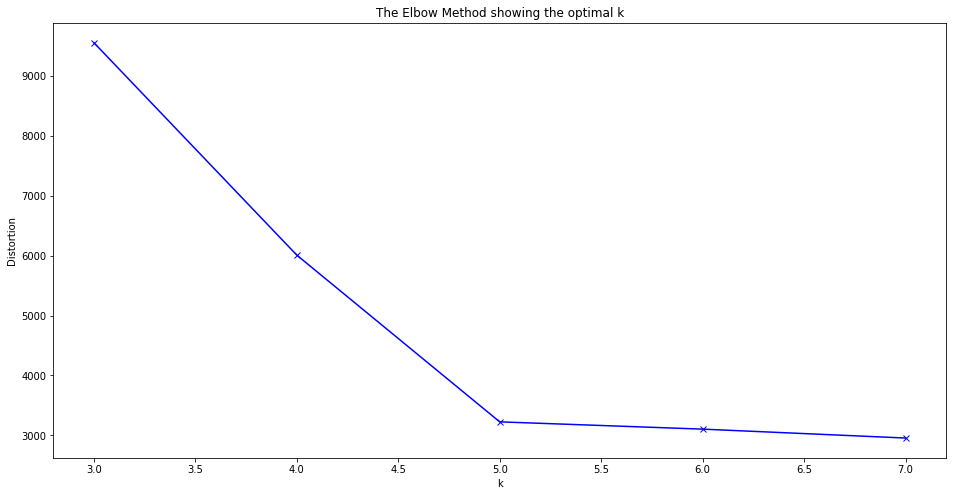

In [37]:
'''
- Use the elbow method to find how many clusters are optimal for this dataset.
- Plot will be saved instead of shown on screen.
'''

from sklearn.cluster import KMeans 
import numpy as np
import matplotlib.pyplot as plt

# Parameters
K_option = [3,4,5,6,7]

# Loading the data
X = np.loadtxt('./data/k_means_and_pca/clusters.txt', dtype=int)

distortions = []
for k in K_option:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    # save score
    score = kmeans.score(X)
    distortions.append(kmeans.inertia_)

# Elbow method
# k nums which are shown after the steep curve are the solutions
plt.figure(figsize=(16,8))
plt.plot(K_option, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.savefig('./data/k_means_and_pca/elbow.png')

In [38]:
'''
Perform PCA on the provided dataset and determine the minimum number of
components required to express 95% of the variance.
'''
import numpy as np
from sklearn.decomposition import PCA

# Parameters
data_path = './data/k_means_and_pca/clusters.txt'
pct_variance = 0.95

# Load data
X = np.loadtxt(data_path, dtype=int)

# Perform PCA
pca = PCA(n_components=None)
pca.fit(X)

# print components variance
pca_cumsum = np.cumsum(pca.explained_variance_ratio_)
print(f"Variance: {pca_cumsum}")

# Find number of components required to express 95% of the variance
num_components = np.argmax(pca_cumsum >= pct_variance) + 1
print(f"Number of components needed to explain {pct_variance} fo data: {num_components}")


Variance: [0.39540225 0.67312775 0.83557005 0.91588029 0.93656342 0.95479334
 0.97030283 0.98210965 0.99213048 1.        ]
Number of components needed to explain 0.95 fo data: 6


In [39]:
'''
- PCA transformed data(SUB-QUESTION B)
- Perform K-means(SUB-QUESTION A)
- Calculate the Inertia (sumof squared differences of samples to the closest centroid)
'''

import numpy as np
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Parameters
data_path = './data/k_means_and_pca/clusters.txt'
pct_variance = 0.95
K_options = [5,6] # (SUB-QUESTION A)

# Load data
X = np.loadtxt(data_path, dtype=int)

# Perform PCA
pca = PCA(n_components=None)
pca.fit(X)

pca_cumsum = np.cumsum(pca.explained_variance_ratio_)

# Find number of components required to express 95% of the variance
num_components = np.argmax(pca_cumsum >= pct_variance)

# Trim number of components
X_trim = pca.transform(X)[:, :num_components]

# K means
for K in K_options:
    # Perform K-means
    kmeans = KMeans(n_clusters=K)
    kmeans.fit(X_trim)
    # Calculate the Inertia (sumof squared differences of samples to the closest centroid)
    inertia = kmeans.inertia_
    print(f"Inertia for K={K}: {inertia}")



Inertia for K=5: 1779.6870825612293
Inertia for K=6: 1670.3751588984849


# 24: Linear Regression

Apply Linear Regression to the provided data to obtain a model of the form y=ax+b.

Follow the provided guidelines for the implementation.
What are the values of the parameters "a" and "b" in that model (APPROXIMATELY)?

-a = 0.23, b = 25.60

-a = 0.55, b = 19.86 ---- answer

-a = 0.82, b = 19.86

-a = 0.55, b = 12.37

-a = 0.23, b = 12.37

a = 0.82, b = 25.60

# Code

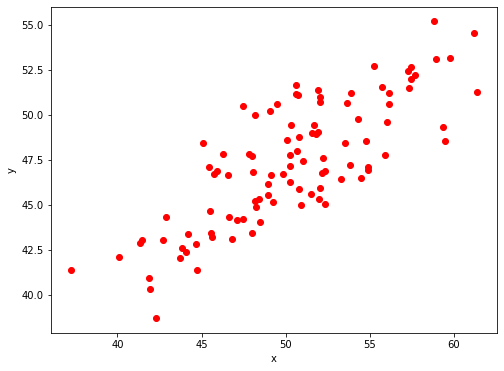

In [40]:
# Linear regression
# Given the dataset x, y apply linear regression to find the model of the form: y = ax + b

# What are the values of "a" and "b" in that model?

# Recall: 
# ```{Python}
# x_reshaped = x.reshape(-1, 1) #fit needs data in this shape
# # Initialize and fit model
# lm = LinearRegression()
# model = lm.fit(input, target)
# ```


x = np.loadtxt('Question_24/lr_x.txt', dtype=float)
y = np.loadtxt('Question_24/lr_y.txt', dtype=float)
plt.figure(figsize=(8, 6))
plt.plot(x, y, 'ro')   # scatter plot showing actual data
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [41]:
x_reshaped = x.reshape(-1, 1) #fit needs data in this shape
# Initialize and fit model
lm = LinearRegression()
model = lm.fit(x_reshaped, y)

In [42]:
print("a",lm.coef_)
print("b",lm.intercept_)

a [0.54587938]
b 19.856337311955023


# 25: DBSCAN

The clustering algorithm DBSCAN needs to always have some points assigned as
"noise points".

Is this statement correct or wrong?

-Correct

-Wrong  --- answer

# 26: State Estimation

## Histogram Filter + Kalman Filter

### 26.1 : With regards to Histogram Filter, select the correct statement

-Histogram Filter Concerns Discrete States --- answer

-Histogram Filter Concerns Unimodal Uncertainty Distributions

-In the Histogram filter, measurement involves convolution and movement
involve the Bayes rule


### 26.2 : With regards to Kalman filter, select the correct statement

-In Kalman filter, the variance of the estimation is higher after
measurement

-In Kalman filter, the variance of the estimation is higher after movement---answer

-Kalman Filter Concerns Discrete States

-Kalman Filter Concerns Multimodal Uncertainty Distributions

# 27 - Numerical - Kalman Filter, State Prediction, Covariance Prediction

You are tracking an object with a Kalman filter. At the current time the state is:
    
x  3

x '0.5

y  2

y' 0.33

and the current covariance is:

5 1 0 0

1 2 0 0

0 0 5 1

0 0 1 2

With x and y being the position in the x and y direction and x', y' being the velocities
in the x and y direction, we assume the object follows a constant velocity model
and that there are no external forces (u=0) and no process noise.
If we have a timestep of dt=1, What is:
The next predicted state and the next predicted covariance?

# Code for 27

In [68]:
# Parameters
state_dim = 4

state = np.array([[3],   # x
                [0.5],   # velocity x
                [2],     # y
                [0.33]]) # velocity y
covariance = np.array([[5, 1, 0, 0],
                        [1, 2, 0, 0],
                        [0, 0, 5, 1],
                        [0, 0, 1, 2]])
delta_t = 1
state_transition_matrix = np.array([[1, delta_t, 0, 0],
                                    [0, 1, 0, 0],
                                    [0, 0, 1, delta_t],
                                    [0, 0, 0, 1]])
noise = np.zeros((state_dim, state_dim))

# Create kalman filter
kalman = KalmanFilter (dim_x=state_dim, dim_z=2)

# initialize
kalman.x = state

# state trasition matrix - is it correct?
kalman.F = state_transition_matrix

# Noise
kalman.Q = noise

# covariance matrix
kalman.P = covariance

kalman.predict()
print(f"state\n{kalman.x}\n\ncovariance\n{kalman.P}")

state
[[3.5 ]
 [0.5 ]
 [2.33]
 [0.33]]

covariance
[[9. 3. 0. 0.]
 [3. 2. 0. 0.]
 [0. 0. 9. 3.]
 [0. 0. 3. 2.]]


# Answer - C

state

[[3.5 ]

 [0.5 ]
 
 [2.33]
 
 [0.33]]

covariance

[[9. 3. 0. 0.]

 [3. 2. 0. 0.]
 
 [0. 0. 9. 3.]
 
 [0. 0. 3. 2.]]

# 28 - Numerical - Kalman Tracking

You are now tracking a different object using a Kalman filter and a constant velocity
model. You have just predicted the state and covariance:
    
x 5

x' 0.5

y 7

y' 0.8

0.2 0 0 0

0.2 0.1 0 0

0 0 0.2 0

0 0 0.2 0.1

Furthermore, we have just measured the position of the object to be:
    
4.8

7.1

Finally, we have the observation noise R:
    
0.2 0.2

0.2 0.2

What is the state after having updated it with the current measurement (do not run
the predict step, only the update step)?


# Code for 28

In [44]:
# Parameters
state_dim = 4

state = np.array([[5],   # x
                [0.5],   # velocity x
                [7],     # y
                [0.8]])  # velocity y

measurement = np.array([[4.8],[7.1]]) # x , y
meas_dim = len(measurement)
covariance = np.array([[0.2, 0.0, 0.0, 0.0],
                        [0.2, 0.1, 0.0, 0.0],
                        [0.0, 0.0, 0.2, 0.0],
                        [0.0, 0.0, 0.2, 0.1]])
delta_t = 1
state_transition_matrix = np.array([[1, delta_t, 0, 0],
                                    [0, 1, 0, 0],
                                    [0, 0, 1, delta_t],
                                    [0, 0, 0, 1]])

noise = np.zeros((state_dim, state_dim))
R = np.array([[0.2, 0.2],
                [0.2, 0.2]])

measurement_f = np.array([[1, 0, 0, 0], # x
                        [0, 0, 1, 0]])  # y

# Create kalman filter
kalman = KalmanFilter (dim_x=state_dim, dim_z=meas_dim)

# initialize
kalman.x = state

# state trasition matrix - is it correct?
kalman.F = state_transition_matrix

# oise
kalman.Q = noise

# measurement function
kalman.H = measurement_f

# covariance matrix
kalman.P = covariance

kalman.R = R
kalman.update(measurement)
print(f"state\n {kalman.x }\n\ncovariance\n{kalman.P}")

state
 [[4.83333333]
 [0.33333333]
 [7.13333333]
 [0.93333333]]

covariance
[[ 6.66666667e-02 -1.38777878e-17  6.66666667e-02  6.93889390e-18]
 [ 6.66666667e-02  1.00000000e-01  6.66666667e-02  6.93889390e-18]
 [ 6.66666667e-02  6.93889390e-18  6.66666667e-02 -1.38777878e-17]
 [ 6.66666667e-02  6.93889390e-18  6.66666667e-02  1.00000000e-01]]


# Answer - A

state

 [[4.83333333]
  
 [0.33333333]
  
 [7.13333333]
  
 [0.93333333]]

covariance

[[ 6.66666667e-02 -1.38777878e-17  6.66666667e-02  6.93889390e-18]
 
 [ 6.66666667e-02  1.00000000e-01  6.66666667e-02  6.93889390e-18]
 
 [ 6.66666667e-02  6.93889390e-18  6.66666667e-02 -6.93889390e-18]
 
 [ 6.66666667e-02  6.93889390e-18  6.66666667e-02  1.00000000e-01]]

# 29: SVM

You will train and test a Support Vector Machine (SVM).
Please use the material provide in the archive.

### 29.1:

Examine the provided code. What proportion of the original dataset is used for
training?

-Proportion used for training: 30%

-Proportion used for training: 70%  --- answer

-Proportion used for training: 75%

### 29.2:

Apply a SVM as instructed in the provided code. What is the reported accuracy of
your SVM (APPROXIMATELY)?

-Accuracy: 0.83

-Accuracy: 0.92

-Accuracy: 0.96  --- answer 

# Code

In [45]:
#Question 29.1 +29.2
# Parameters
data_path_x = 'Question_29/svm_x.txt'
data_path_y = 'Question_29/svm_y.txt'

# Load data
x = np.loadtxt(data_path_x, dtype=float)
y = np.loadtxt(data_path_y, dtype=int)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1337)
print(f"Proportion used for training: {len(X_train)*100/len(x):.1f}%")

# Apply SVM with Linear Kernel
clf = svm.SVC(kernel='linear')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(f"Accuracy: {metrics.accuracy_score(y_test, y_pred):.2f}")

Proportion used for training: 69.9%
Accuracy: 0.96


# 30: KNN

The classification algorithm k-NN requires approximately similar time for training
and testing (inference).

Is this statement correct or wrong?

Correct

Wrong -- answer


https://stackoverflow.com/questions/53133458/why-does-test-takes-longer-than-training

# 31: Visual Odometry

Visual Odometry

### 31.1  - Concerning Visual Odometry, select the correct statement

-The 3D to 3D methods are less accurate than the 3D to 2D ones --- answer

-The axis angle representation suffers from the "gimbal lock" problem

-Visual Odometry can only be performed on a frame to frame manner

### 31.2 - Concerning Visual Odometry, select the correct statement

-2D to 2D methods are "accurate up to scale" -- answer

-3D to 3D approaches use the image coordinates of the current frame and
the 3D position of the previous frame to estimate the motion

-2D to 2D methods are equivallent to calculating the fundamental matrix

# 32  - Numerical - Visual Odometry

As an alternative to GPS, a car is driving while recording images with a stereo
camera setup with the goal of tracking the relative position of the car.
In the provided material (you downloaded) the two directories left and right contain
timestamped images from the drive

The steps to tracking the car is as follows:
    
Do only once:

1.1. Capture two frames I , I

1.2. Extract and match features between them

1.3. Triangulate features from I , I

Do at each iteration:

2.1. Capture new frame I

2.2. Extract features and match with previous frame I

2.3. Compute camera pose (PnP) from 3-D-to-2-D matches

2.4. Triangulate all new feature matches between I and I

2.5. Iterate from 2.1

Compute the final Pose (Position: [X,Y,Z] Orientation: [axis angles x, axis angles y,
axis angles z]) of the car.

Note:

baseline = 0.54

#Camera Matrix

K = np.array([[7.188560e+02, 0.000000e+00, 6.071928e+02], [0, 7.188560e+02,
1.852157e+02], [0, 0, 1]])

#projection matrix for Left and Right Image. The images are stereo rectified, i.e.
perfectly parallel and scanline, so:
    
M_left = K.dot(np.hstack((np.eye(3), np.zeros((3, 1)))))

M_rght = K.dot(np.hstack((np.eye(3), np.array([[-baseline, 0, 0]]).T)))

# Code

In [46]:
# Params
MATCH_NUM = 400
IMG_PATH = 'Question_32'
K = np.array([[7.188560e+02, 0.000000e+00, 6.071928e+02], [0, 7.188560e+02, 1.852157e+02], [0, 0, 1]])
BASELINE = 0.54
SHOW_IMG = True
# Specify img range(check dir)
IMG_START = 400
IMG_END = 451

def extract_keypoints_surf(img1, img2, K, baseline):
    """
    use surf to detect keypoint features
    remember to include a Lowes ratio test
    """
    surf = cv2.SIFT_create()
    kp1, des1 = surf.detectAndCompute(img1,None)
    kp2, des2 = surf.detectAndCompute(img2,None)
    
    matcher = cv2.DescriptorMatcher_create(cv2.DescriptorMatcher_FLANNBASED)
    knn_matches = matcher.knnMatch(des1, des2, 2)
    
    
    # Filter matches using the Lowe's ratio test
    ratio_thresh = 0.7
    good_matches = []
    for m,n in knn_matches:
        if m.distance < ratio_thresh * n.distance:
            good_matches.append(m)
            
    good_matches = sorted(good_matches, key = lambda x:x.distance)
    good_matches = good_matches[:MATCH_NUM]
    
    matchesTrainIdx = [x.trainIdx  for x in good_matches]
    matchesQueryIdx = [x.queryIdx  for x in good_matches]
   
    match_points1 = [kp1[i].pt for i in matchesQueryIdx]
    match_points2 = [kp2[i].pt for i in matchesTrainIdx]
    
    p1 = np.float32(np.array(match_points1))
    p2 = np.float32(np.array(match_points2))

    #project the feature points to 3D with triangulation
    
    M_left = K.dot(np.hstack((np.eye(3), np.zeros((3, 1)))))
    M_rght = K.dot(np.hstack((np.eye(3), np.array([[-baseline, 0, 0]]).T)))

    p1_flip = np.vstack((p1.T, np.ones((1, p1.shape[0]))))
    p2_flip = np.vstack((p2.T, np.ones((1, p2.shape[0]))))

    P = cv2.triangulatePoints(M_left, M_rght, p1_flip[:2], p2_flip[:2])

    # Normalize homogeneous coordinates (P->Nx4  [N,4] is the normalizer/scale)
    P = P / P[3]
    land_points = P[:3]

    return land_points.T, p1

def featureTracking(prev_img, next_img, prev_points, world_points):
    """
    Use OpenCV to find the prev_points from the prev_img in the next_img
    Remember to remove points that could not be found from prev_points, next_points, and world_points
    """
    params = dict(winSize=(21, 21),
                 maxLevel=3,
                 criteria=(cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 30, 0.01))
    
    
    next_points, status, _ = cv2.calcOpticalFlowPyrLK(prev_img, next_img, prev_points, nextPts=None, \
                                                      winSize=params["winSize"], maxLevel=params["maxLevel"], criteria=params["criteria"])
    
    next_points = np.squeeze(next_points[np.where(status[:,0]==1),:])
    prev_points = np.squeeze(prev_points[np.where(status[:,0]==1),:])
    world_points = np.squeeze(world_points[np.where(status[:,0]==1),:])
    
    return world_points, prev_points, next_points

def get_image(path, index):
    return cv2.imread(f'{path}/{index:010d}.png')

if __name__ == '__main__':
    left_img = get_image(f"{IMG_PATH}/left", IMG_START)
    right_img = get_image(f"{IMG_PATH}/right", IMG_START)

    # Get 3D points Using Triangulation
    landmark_3D, reference_2D = extract_keypoints_surf(left_img, right_img, K, BASELINE)
    
    # reference
    prev_img = left_img
    traj = np.zeros((left_img.shape[0]//2, 300, 3), dtype=np.uint8)
    for i in range(IMG_START, IMG_END):
        curImage = get_image(f"{IMG_PATH}/left", i)
        curImage_R = get_image(f"{IMG_PATH}/right", i)

        # the 2D landmarks at the current time = t
        landmark_3D, reference_2D, tracked_2Dpoints = featureTracking(prev_img, 
                                                                      curImage, 
                                                                      reference_2D,
                                                                      landmark_3D)

        #Calculate relative pose using PNP
        _, rvec, tvec, _ = cv2.solvePnPRansac(landmark_3D,tracked_2Dpoints,K, None)
    
        rot, _ = cv2.Rodrigues(rvec)
        tvec = -rot.T.dot(tvec)  # coordinate transformation, from camera to world. What is the XYZ of the camera wrt World
        inv_transform = np.hstack((rot.T, tvec))  # inverse transform. A tranform projecting points from the camera frame to the world frame

        # re-obtain the 3D points
        landmark_3D_new, reference_2D_new = extract_keypoints_surf(curImage, curImage_R, K, BASELINE)
        
        #Project the points from camera to world coordinates
        reference_2D = reference_2D_new.astype('float32')
        landmark_3D = inv_transform.dot(np.vstack((landmark_3D_new.T, np.ones((1, landmark_3D_new.shape[0])))))
        landmark_3D = landmark_3D.T

        prev_img = curImage

        # draw images
        draw_x, draw_y = int(tvec[0]) + 150, (left_img.shape[0]//2)-(int(tvec[2]) + 50);

        print(f"\nImage: {i}\nPosition: {tvec.squeeze()}\nRotation: {rvec.squeeze()}")
        
        if SHOW_IMG:
            text = "Coordinates:\n x ={0:02f}m\n y = {1:02f}m\n z = {2:02f}m".format(float(tvec[0]), float(tvec[1]),
                                                                            float(tvec[2]))
            text = text.split('\n')
            text_frame = np.zeros((left_img.shape[0]//2, 300, 3), dtype=np.uint8);
            cv2.circle(traj, (draw_x, draw_y), 1, (0, 0, 255), 2)
            cv2.putText(text_frame, text[0], (10, 30), cv2.FONT_HERSHEY_PLAIN, 1, (255, 255, 255), 1, 8)
            cv2.putText(text_frame, text[1], (10, 60), cv2.FONT_HERSHEY_PLAIN, 1, (255, 255, 255), 1, 8)
            cv2.putText(text_frame, text[2], (10, 90), cv2.FONT_HERSHEY_PLAIN, 1, (255, 255, 255), 1, 8)
            cv2.putText(text_frame, text[3], (10, 120), cv2.FONT_HERSHEY_PLAIN, 1, (255, 255, 255), 1, 8)
            
            vis = np.vstack((text_frame, traj))
            vis = np.hstack((curImage, vis))
            
            cv2.imshow("Trajectory", vis)
            k = cv2.waitKey(1) & 0xFF
            if k == 27: break
    print(f"\n\n======= Results ======= \nPosition: {tvec.squeeze()}\nRotation: {rvec.squeeze()}")
    cv2.destroyAllWindows()


Image: 400
Position: [-0.00074797 -0.00367526  0.00033238]
Rotation: [ 2.65985771e-05 -4.43277865e-05  2.01532735e-04]

Image: 401
Position: [-0.01443456 -0.01937689  0.62692232]
Rotation: [0.00312522 0.0003454  0.00200143]

Image: 402
Position: [-0.0233967  -0.04022828  1.21825596]
Rotation: [0.00617265 0.00258651 0.00066323]

Image: 403
Position: [-0.02381381 -0.05384729  1.78995249]
Rotation: [ 0.00581436  0.00744938 -0.00528397]

Image: 404
Position: [-0.0334027  -0.07136044  2.33745325]
Rotation: [ 0.00403351  0.0153428  -0.00874986]

Image: 405
Position: [-0.04849905 -0.0841699   2.87401815]
Rotation: [ 0.00039284  0.02626703 -0.01102913]

Image: 406
Position: [-0.08601174 -0.09547591  3.39577395]
Rotation: [-0.00304519  0.04018195 -0.01133143]

Image: 407
Position: [-0.13177203 -0.10891879  3.89908862]
Rotation: [-0.00512459  0.05893272 -0.01135405]

Image: 408
Position: [-0.18633347 -0.12019668  4.40408318]
Rotation: [-0.00377174  0.08079227 -0.01451167]

Image: 409
Position: 

# Answer - B

======= Results from question =======

Position = [-16.908] [0.684] [11.727]

Rotation = [0.0102] [1.596] [0.072]


======= Results from Mactat =======

Position: [-17.0367098    0.72663223  11.790021  ]
    
Rotation: [0.012633   1.59476864 0.07550209]

# 33: SLAM

With regards to non-linear least squares
optimization for SLAM select the correct statement

-Gauss-Newton does not suffer from overshooting

-Levenberg Marquadt suffers from slow covergence

-Levenberg Marquadt is a combination of Gauss-Newton and Gradient
Descent  --- answer


# 34: SLAM

With regards to SLAM select the correct statement

-SLAM is concerned solely with the identification of the position of a
camera

-SLAM is defined as a graph where nodes are the poses/3D landmark
positions and edges are the observations/odometry  -------------answer

-The goal of SLAM is to satisfy only the pose nodes in the pose graph